# Artificial Intelligence
## UEMH3073 / UECS2053 / UECS2153

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.
    

The #TODO tasks and their marks distribution are as follows:
 
a. #TODO1 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population. 

b. #TODO2 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection. 

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

d. #TODO4 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with Merge, Sort & Truncate. 
    
e. #TODO5 (10 marks) in the Crossover function. You will replace the dummy crossover function the Partially Mapped Crossover approach.

f. #TODO6 (10 marks) in the Mutation function. You will replace the dummy mutation function with Insertion Mutation approach. 

g. #TODO7 (10 marks) in Performance Evaluation. You will present performance evaluation for the different Parent Selection functions. 

Marks are also given for: Report Presentation and Formatting (15%) and Code Quality and Comments (15%). More details about this notebook and assignment are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once. 

## Imports

In [53]:
%matplotlib inline

# Please add more imports if you need them 

import random
import time
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print 
from itertools import combinations

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

In [54]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path. 

In [55]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = None
        self.fitness = None
    
    def routeDistance(self):
        if self.distance == None:
            pathDistance = 0.0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == None:
        # Fitness function (Simple division) that uses a simple 
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance()) 
            # Note: You must ensure a division by zero does not occur 
        return self.fitness


## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization. 

The first function is genCityList() which generates a set of cities from a file.  

In [56]:
def genCityList(filename):
    cityList = []
    
    # TODO 1 (10 marks) - Replace the following codes that generate 10 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating 
    # an initial population.  
    
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value. 
    # 0 marks:        No answer is given. 
    
    # Replacement starts here
    
    # Read cities from CSV file into a DataFrame
    citiesDF = pd.read_csv(filename)

    # Create a list of City objects from the X, Y columns
    cityList = [City(X, Y) for _, X, Y in citiesDF.itertuples(index=False)]
    
    # Replacement ends here
    
    return cityList



The second function is createRoute() which generates a random route (chromosome) from a set of City instances.

In [57]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [58]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList as follows:

cityList = genCityList('cities10.txt') 
print(cityList)

Sample run 2 initializes 10 cities in cityList and creates a population with three routes as follows:

cityList = genCityList('cities10.txt') 
population = initialPopulation(3, cityList) 
print(population)

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population. 

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs random selection.

In [59]:
def randomSelection(population, poolSize=None):
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    for i in range(0, poolSize):
        fitness = Fitness(population[i]).routeFitness()
        matingPool.append(random.choice(population))
      
    return matingPool

The second parentSelection() performs Tournament Selection.

In [60]:
def tournamentSelection(population, poolSize=None):

    # TODO 2 (10 marks) - Replace the dummy parent selection function below with
    # Tournament Selection.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # You will need to compare the performance achieved by Random Selection,
    # Tournament Selection, and Proportional Selection during performance evaluation
    # later. So, you will run either Random Selection, Tournament Selection, or
    # Proportional Selection in a simulation run.

    if poolSize == None:
        poolSize = len(population)

    matingPool = []

    # Replacement starts here

    # Set population size
    pop_size = len(population)

    # Set tournament size
    tournament_size = 30

    # Calculate fitness values
    fitness_values = np.array([Fitness(route).routeFitness() for route in population], dtype=float)

    # Convert lists to numpy arrays
    pop_array = np.array(population, dtype=object)

    # For each selection, randomly pick tournament_size individuals and select the best (highest fitness)
    for _ in range(poolSize):
        # random tournament indices
        idx = np.random.choice(pop_size, tournament_size, replace=False)
        
        # pick index with max fitness
        best_idx = idx[np.argmax(fitness_values[idx])]
        matingPool.append(population[best_idx])

    # Replacement ends here

    return matingPool

The third parentSelection() performs Proportional Selection.

In [61]:
def proportionalSelection(population, poolSize=None):
    
    # TODO 3 (10 marks) - Replace the dummy parent selection function below with  
    # Proportional Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    # Replacement starts here

    # Calculate fitness values
    fitness_values = np.array([Fitness(route).routeFitness() for route in population], dtype=float)

    # Calculate total fitness of the population
    total_fitness = fitness_values.sum()

    # If total fitness is zero, select randomly to avoid division by zero
    if (total_fitness == 0):
        return random.choices(population, k=poolSize)
    
    # Find probabilities
    probabilities = fitness_values / total_fitness

    # Select indices
    selected_indices = np.random.choice(len(population), size=poolSize, replace=True, p=probabilities)

    # Fill mating pool as a list
    matingPool = [population[i] for i in selected_indices]
    
    # Replacement ends here
    
    return matingPool

### Survival Selection

In [62]:
def survivorSelection(population, eliteSize):

    # TODO 4 (10 marks) - Replace the dummy survival selection function below with
    # Merge, Sort & Truncate.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    elites = []

    # Replacement starts here

    # Calculate fitness values
    fitness_values = [(route, Fitness(route).routeFitness()) for route in population]
    
    # Sort by fitness (descending)
    fitness_values.sort(key=lambda x: x[1], reverse=True)
    
    # Extract only the elite routes
    elites = [route for route, _ in fitness_values[:eliteSize]]
    
    # Replacement ends here

    return elites

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code. 

Sample run 1 initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

population = initialPopulation(4, genCityList('cities10.txt'))
matingpool = parentSelection(population, 4) 
print('Initial population') 
print(population) 
print('Mating pool') 
print(matingpool)

Sample run 2 initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

population = initialPopulation(4, genCityList('cities10.txt'))
elites = survivorSelection(population, 1)
print('Initial population')
print(population)
print('Selected elites')
print(elites)

In [63]:
def crossover(parent1, parent2):

    # TODO 5 (10 marks) - Replace the dummy crossover function below with
    # Partially Mapped Crossover approach.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # Replacement starts here
    size = len(parent1)

    # Initialize children
    child1 = [None] * size
    child2 = [None] * size

    # Choose two random crossover points 
    cx_pt1, cx_pt2 = sorted(random.sample(range(size), 2))

    # such that the segment length is >= 5% of the chromosomes length
    while (cx_pt2 - cx_pt1) < 0.05 * len(parent1):
        cx_pt1, cx_pt2 = sorted(random.sample(range(size), 2))

    # Copy the crossover slice from parents to children
    child1[cx_pt1:cx_pt2] = parent1[cx_pt1:cx_pt2]
    child2[cx_pt1:cx_pt2] = parent2[cx_pt1:cx_pt2]

    def fill_child(child, parent_a, parent_b):
        # Fill the rest of the child with genes from parent_b
        for i in (*range(0, cx_pt1), *range(cx_pt2, size)):
            gene = parent_b[i]

            # Map genes to avoid duplicates based on the crossover segment in parent_a
            while gene in parent_a[cx_pt1:cx_pt2]:
                gene = parent_b[parent_a.index(gene)]

            child[i] = gene
        return child

    # Complete children by filling in remaining genes
    child1 = fill_child(child1, parent1, parent2)
    child2 = fill_child(child2, parent2, parent1)

    # Replacement ends here

    return child1, child2

## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [64]:
def breedPopulation(matingpool):
    children = []
    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible. 
    
    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)
    
    return children

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes 2 chromosomes in the population, and performs crossover among the two parents. 

population = initialPopulation(2, genCityList('cities10.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Salesman Problem, a mutated chromosome must be a valid path. As an example, the insertion mutation randomly inserts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. Step 1: select a gene randomly, Step 2: insert this gene into a randomly selected location.

In [65]:
def mutate(route, mutationProbability):
    
    # TODO 6 (10 marks) - Replace the dummy mutation function below with Insertion Mutation.
    # The dummy mutation function simply swaps a city with the city before it.  
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
     
    mutated_route = route[:]
    for i in range(len(route)):
        if (random.random() < mutationProbability):
            # mutationProbability is the probability of a gene undergoing mutation
            
            # Replacement starts here

            # Remove the city at index i
            city = mutated_route.pop(i)

            # Re-insert it at a random position in the route
            insert_index = random.randint(0, len(mutated_route))
            mutated_route.insert(insert_index, city)
            
            # Replacement ends here
    return mutated_route

Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability. 

In [66]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 10 cities in cityList, and then mutates it as follows:

route = genCityList('cities10.txt')
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

## Running One Generation (or Iteration)

Here, we run one generation of genetic algorithm. 

In [67]:
def oneGeneration(population, eliteSize, mutationProbability, parentSelection):
    
    # First we preserve the elites
    elites = survivorSelection(population, eliteSize)
    
    # Then we calculate what our mating pool size should be and generate
    # the mating pool
    poolSize = len(population) - eliteSize
    matingpool = parentSelection(population, poolSize)
        
    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)
    
    # We combine the elites and children into one population
    new_population = elites + children
    
    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)
        
    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 10 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

population = initialPopulation(5, genCityList('cities10.txt'))
eliteSize = 1
mutationProbability = 0.01
new_population = oneGeneration(population, eliteSize, mutationProbability)
print('Initial population')
print(population)
print('New population')
print(new_population)

## Running Many Generations (or Iterations) 

'Best distance in iteration 1/1000 (Tournament Selection): 19871.54856258213'
'Best distance in iteration 2/1000 (Tournament Selection): 19667.645142553607'
'Best distance in iteration 3/1000 (Tournament Selection): 19087.420609672896'
'Best distance in iteration 4/1000 (Tournament Selection): 18817.14452834796'
'Best distance in iteration 5/1000 (Tournament Selection): 18593.346851385042'
'Best distance in iteration 6/1000 (Tournament Selection): 18398.989420330072'
'Best distance in iteration 7/1000 (Tournament Selection): 18223.08293145914'
'Best distance in iteration 8/1000 (Tournament Selection): 17975.015271545384'
'Best distance in iteration 9/1000 (Tournament Selection): 17809.328953271797'
'Best distance in iteration 10/1000 (Tournament Selection): 17621.611416693602'
'Best distance in iteration 11/1000 (Tournament Selection): 17248.983387878194'
'Best distance in iteration 12/1000 (Tournament Selection): 17153.934336612532'
'Best distance in iteration 13/1000 (Tournament Sele

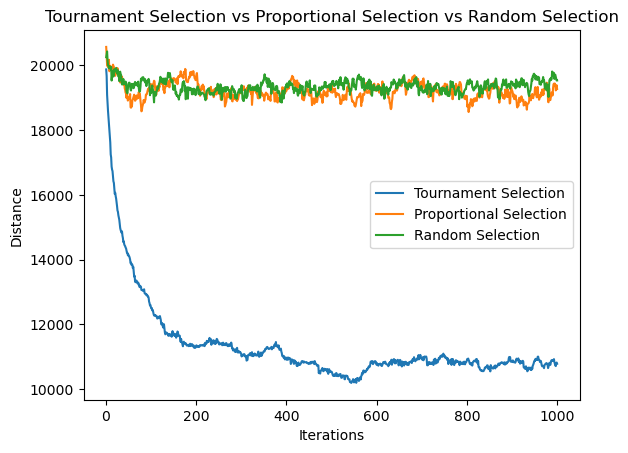

In [68]:
filename = "cities400.txt"
popSize = 250
eliteSize = 18
mutationProbability = 0.01
iteration_limit = 1000

cityList = genCityList(filename)

# population = initialPopulation(popSize, cityList)
# distances = [Fitness(p).routeDistance() for p in population]
# min_dist = min(distances)
# print("Best distance for initial population: " + str(min_dist))
#
# for i in range(iteration_limit):
# population = oneGeneration(population, eliteSize, mutationProbability)
# distances = [Fitness(p).routeDistance() for p in population]
# index = np.argmin(distances)
# best_route = population[index]
# min_dist = min(distances)
# print("Best distance for population in iteration " + str(i) + ": " + str(min_dist))
#
# print("Optimal path is " + str(best_route))


# TODO 7 (10 marks) - Performance Evaluation. You will present the performance achieved
# by different parent selection function. You will compare the
# performance achieved by Random Selection, Tournament Selection, and Proportional Selection.

# Marking scheme:
# 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found.
# 5 to <7 marks:  Clear understanding of performance evaluation.
# >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation.
# 0 marks:        No answer is given.

# Prepare the parent selection strategies to be tested
parentSelections = [
    ("Tournament Selection", tournamentSelection),
    ("Proportional Selection", proportionalSelection),
    ("Random Selection", randomSelection),
]

# Initialize dictionary to store the best path, its distance, and progress (distance over iterations)
results = dict(
    [
        (ps_name, {"Best path": None, "Best distance": float("inf"), "progress": []})
        for ps_name, ps_func in parentSelections
    ]
)

# Run the genetic algorithm for each parent selection strategy
for ps_name, ps_func in parentSelections:
    # Generate the initial population of routes
    population = initialPopulation(popSize, cityList)

    for i in range(iteration_limit):
        # Evolve population by one generation using given parent selection strategy
        population = oneGeneration(population, eliteSize, mutationProbability, ps_func)

        # Calculate distances for all routes in the population
        distances = [Fitness(p).routeDistance() for p in population]

        # Find index of best (shortest) route
        index = np.argmin(distances)
        best_path = population[index]
        min_dist = min(distances)

        # Print progress for the current iteration
        print(
            f"Best distance in iteration {i+1}/{iteration_limit} ({ps_name}): {min_dist}"
        )

        # Track the best distance per iteration
        results[ps_name]["progress"].append(min_dist)

        # Update the best overall path for this selection strategy if improved
        if min_dist < results[ps_name]["Best distance"]:
            results[ps_name]["Best distance"] = min_dist
            results[ps_name]["Best path"] = population[index]

# Print the results of each parent selection
best_ps_name = None
best_path = None
best_distance = float("inf")
for ps_name, _ in parentSelections:
    print(f"==== Results of {ps_name} ====")
    print(f"Best distance: {results[ps_name]['Best distance']}")
    print(f"Best path: {results[ps_name]['Best path']}")

    if results[ps_name]["Best distance"] < best_distance:
        best_ps_name = ps_name
        best_path = results[ps_name]["Best path"]
        best_distance = results[ps_name]["Best distance"]

# Print best results
print(f"Optimal path: {best_path}")
print(f"Optimal distance: {best_distance}")
print(f"Found using:  {best_ps_name}")
print(f"With the following hyperparameters: ")
print(f"Population size: {popSize}")
print(f"Elite size: {eliteSize}")
print(f"Mutation probability: {mutationProbability}")
print(f"Iteration limit: {iteration_limit}")
if best_ps_name == "Tournament Selection":
    print(f"Tournament size: {int(len(population) * 0.1)}")

# Combined plot: all parent selection strategies in one graph
plt.title(" vs ".join([ps_name for ps_name, _ in parentSelections]))
plt.ylabel("Distance")
plt.xlabel("Iterations")
for ps_name, _ in parentSelections:
    plt.plot(range(1, iteration_limit + 1), results[ps_name]["progress"], label=ps_name)
plt.legend()
plt.savefig("Distance vs Iterations.png")